# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import altair as alt
from collections import deque
from IPython.display import display, HTML, clear_output
import ipywidgets as widgets
import time
import sys
import os

# # Add the parent directory to the path manually
# notebook_path = os.path.abspath('.')  # Current directory
# parent_path = os.path.dirname(notebook_path)
# sys.path.append(parent_path)

# Import our custom search helpers
from graph_search import *
from n_puzzle import *
from metrics import *

alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

# Graph Traversal

## Create Demo Graph

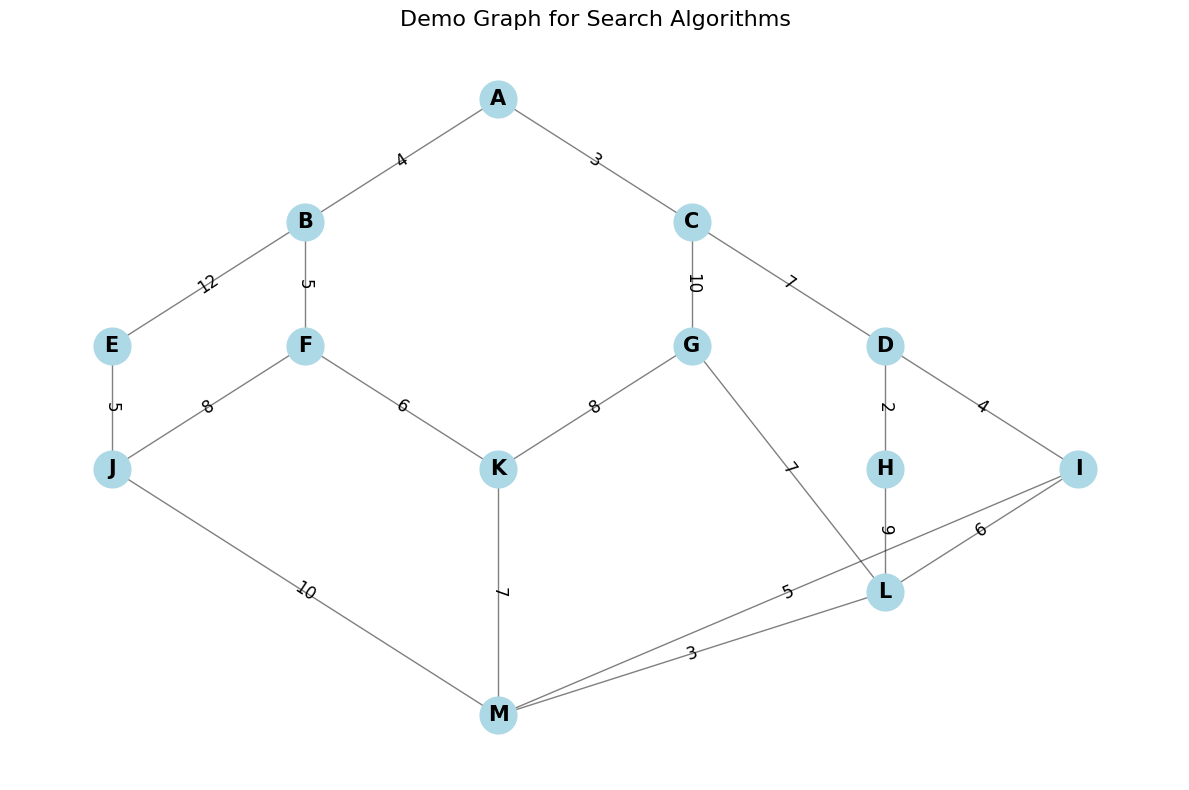

In [2]:
# Create a demo graph
demo_graph = create_demo_graph()

# Visualize the graph
fig = visualize_graph(demo_graph, title="Demo Graph for Search Algorithms")
plt.show()

## Run BFS


Running BFS search from A to M...
✓ Path found! Length: 4, Cost: 31
Path: A -> B -> E -> J -> M
Nodes visited: 13
Max frontier size: 7
Time taken: 0.000043 seconds


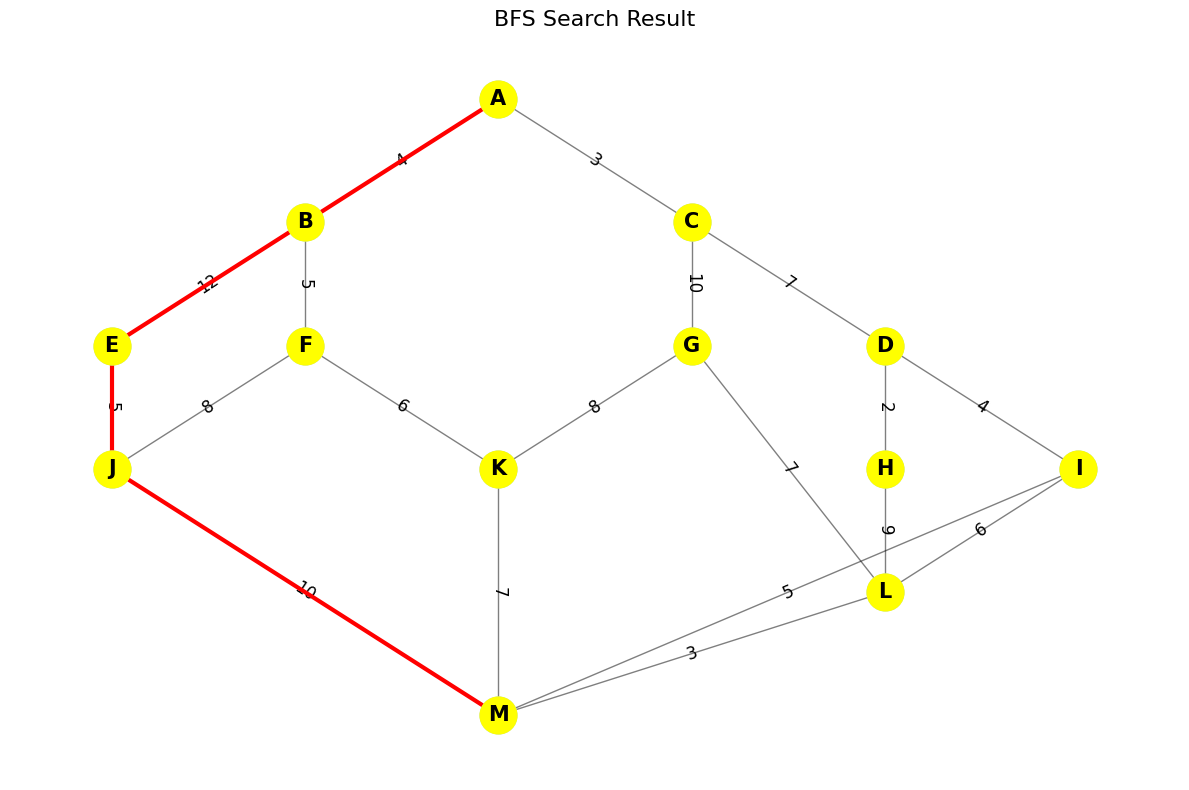

(['A', 'B', 'E', 'J', 'M'],
 ['A', 'B', 'C', 'E', 'F', 'D', 'G', 'J', 'K', 'H', 'I', 'L', 'M'],
 {'time': 4.291534423828125e-05,
  'space': 7,
  'path_cost': 31,
  'nodes_visited': 13})

In [4]:
run_graph_search_example(demo_graph, 'bfs', 'A', 'M')


Running DFS search from A to M...
✓ Path found! Length: 4, Cost: 23
Path: A -> C -> G -> L -> M
Nodes visited: 5
Max frontier size: 6
Time taken: 0.000023 seconds


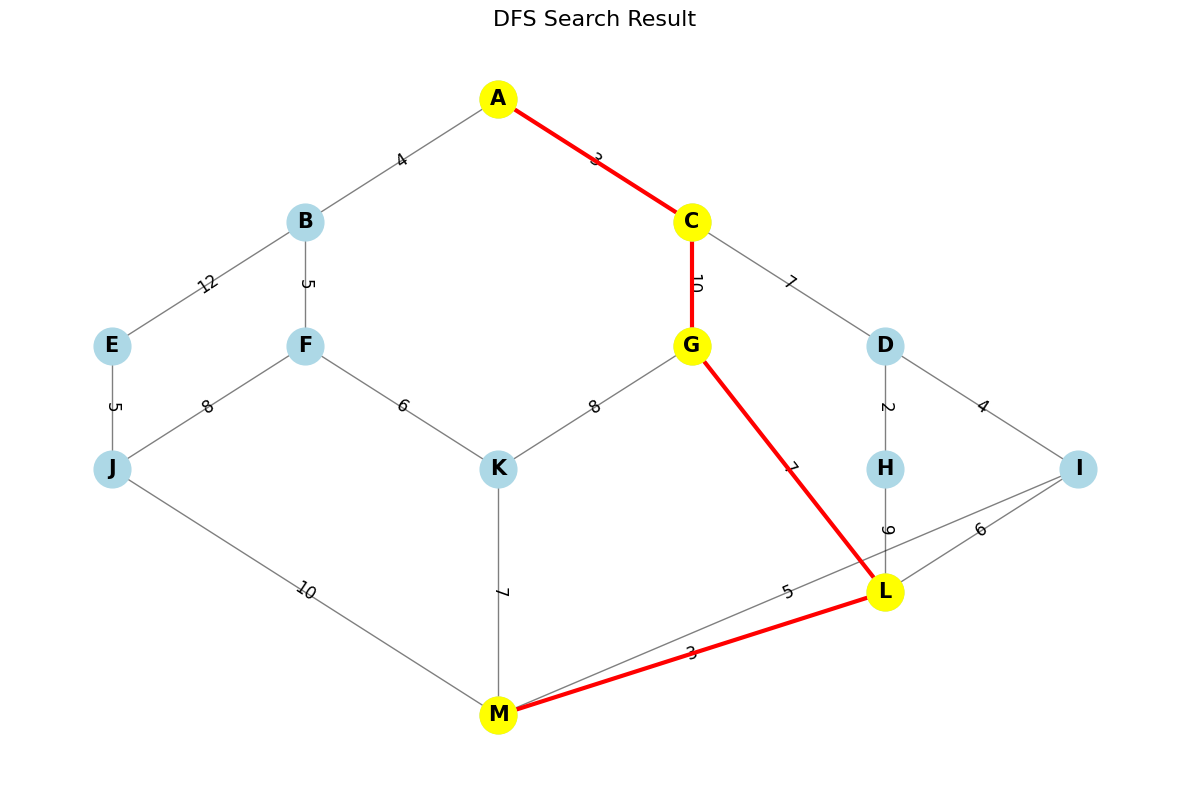

(['A', 'C', 'G', 'L', 'M'],
 ['A', 'C', 'G', 'L', 'M'],
 {'time': 2.288818359375e-05, 'space': 6, 'path_cost': 23, 'nodes_visited': 5})

In [6]:
run_graph_search_example(demo_graph, 'dfs', 'A', 'M')


Running ASTAR search from A to M...
✓ Path found! Length: 4, Cost: 19
Path: A -> C -> D -> I -> M
Nodes visited: 10
Max frontier size: 8
Time taken: 0.000133 seconds


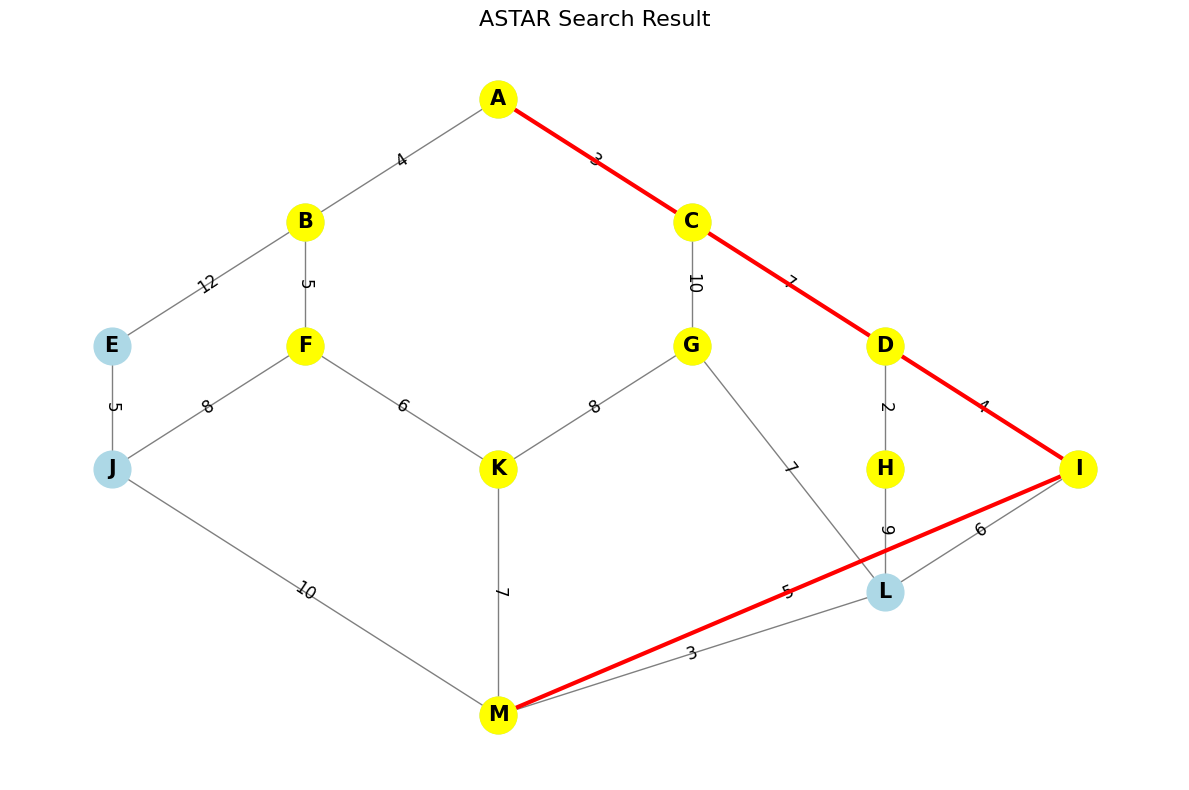

(['A', 'C', 'D', 'I', 'M'],
 ['A', 'C', 'B', 'F', 'D', 'H', 'G', 'K', 'I', 'M'],
 {'time': 0.00013303756713867188,
  'space': 8,
  'path_cost': 19,
  'nodes_visited': 10})

In [5]:
run_graph_search_example(demo_graph, 'astar', 'A', 'M')

## Step by Step Walk Through

In [4]:
create_graph_search_demo(demo_graph)

## Romania

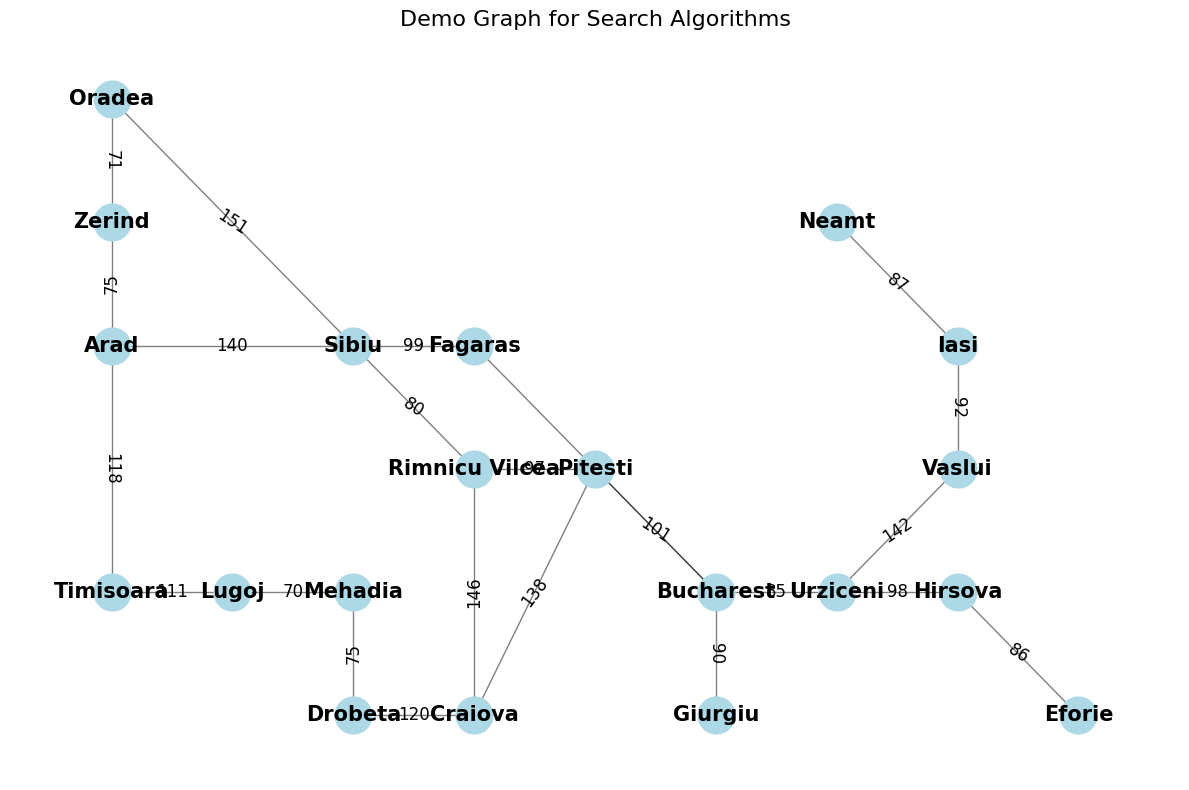

In [5]:
# Create a demo graph
romania_map = create_romania_map()

# Visualize the graph
fig = visualize_graph(romania_map, title="Demo Graph for Search Algorithms")
plt.show()

In [6]:
create_graph_search_demo(romania_map)

## Large Graph

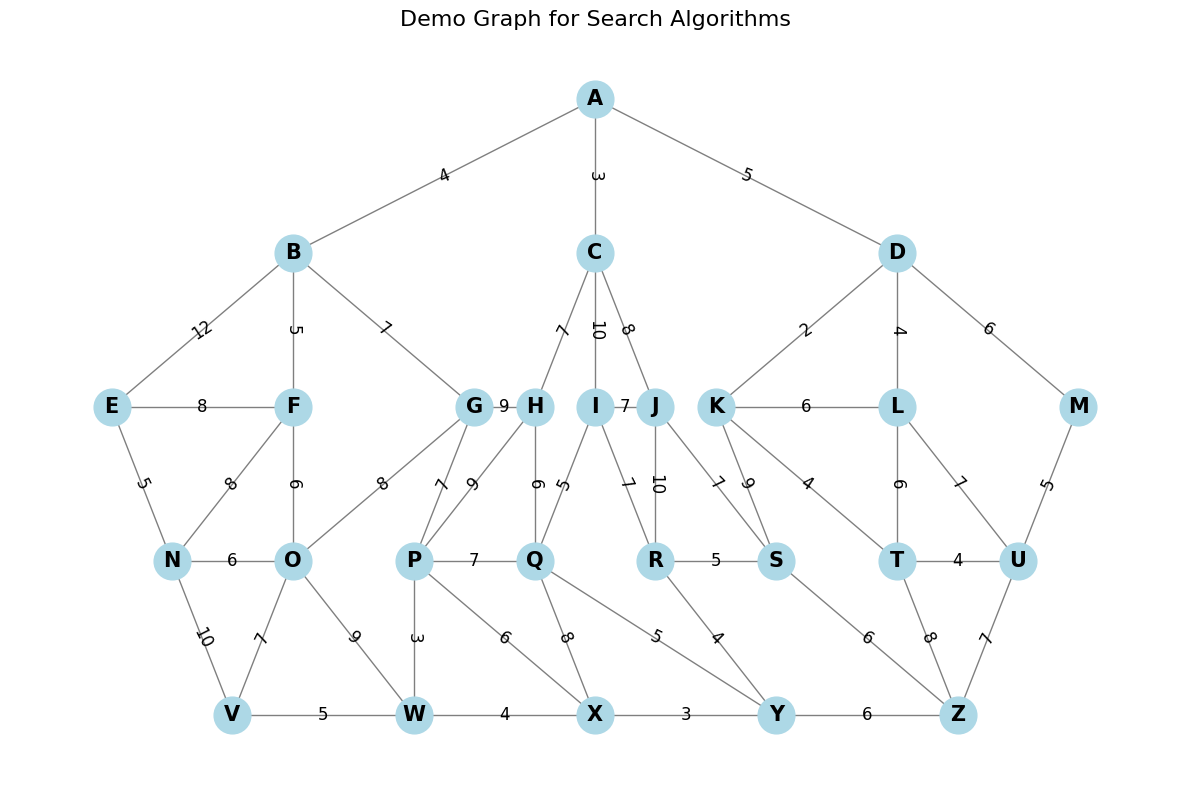

In [7]:
large_graph = create_large_demo_graph()

# Visualize the graph
fig = visualize_graph(large_graph, title="Demo Graph for Search Algorithms")
plt.show()

In [8]:
create_graph_search_demo(large_graph)

## Run simulations

In [9]:
# We'll use predefined start-goal pairs to ensure consistent comparisons
start_nodes = ['A', 'A', 'B', 'C', 'D', 'F', 'J', 'K', 'L']
goal_nodes = ['M', 'L', 'K', 'J', 'M', 'A', 'Z', 'W', 'Y', 'U']

# Define algorithms to include in the simulation
graph_algorithms = ['bfs', 'dfs', 'ucs', 'greedy', 'astar']

print("Running graph search simulations (this may take a moment)...")
# Run the simulations
sim_results_graph = run_graph_search_simulations(
    num_simulations=5,  # Reduced for demonstration
    algorithms=graph_algorithms,
    start_nodes=start_nodes,
    goal_nodes=goal_nodes
)

# Display the results
print("\nSimulation results (sample):")
sim_results_graph.head()

Running graph search simulations (this may take a moment)...

Simulation results (sample):


,simulation,algorithm,start,goal,path_found,path_length,path_cost,nodes_visited,max_frontier_size,time
0,0,bfs,A,M,True,2,11,13,20,0.000047
1,0,dfs,A,M,True,2,11,3,5,0.000008
2,0,ucs,A,M,True,2,11,11,19,0.000034
3,0,greedy_euclidean,A,M,True,2,11,3,5,0.000066
4,0,greedy_manhattan,A,M,True,2,11,3,5,0.000054


In [10]:
# Calculate aggregate statistics
print("\nAggregate performance by algorithm:")
performance_summary = sim_results_graph.groupby('algorithm').agg({
    'time': ['mean', 'std'],
    'path_length': ['mean', 'std'],
    'path_cost': ['mean', 'std'],
    'nodes_visited': ['mean', 'std'],
    'max_frontier_size': ['mean', 'std'],
    'path_found': 'mean'
})

performance_summary


Aggregate performance by algorithm:


time           path_length           path_cost  \
                      mean       std        mean       std      mean   
algorithm                                                              
astar_euclidean   0.000073  0.000050         1.8  0.836660       9.0   
astar_manhattan   0.000065  0.000051         1.8  0.836660       9.0   
bfs               0.000027  0.000016         1.8  0.836660       9.0   
dfs               0.000049  0.000084         7.4  9.181503      47.0   
greedy_euclidean  0.000076  0.000060         2.6  2.509980      17.6   
greedy_manhattan  0.000069  0.000056         2.6  2.509980      17.6   
ucs               0.000020  0.000008         1.8  0.836660       9.0   

                            nodes_visited           max_frontier_size  \
                        std          mean       std              mean   
algorithm                                                               
astar_euclidean    2.121320           3.6  2.073644               6.6   
astar_manhattan    2.121320           3.4  2.073644               6.2   
bfs                2.121320           9.8  4.438468              14.6   
dfs               59.401178           8.8  9.984989              12.4   
greedy_euclidean  20.427922           3.8  2.949576               6.2   
greedy_manhattan  20.427922           3.8  2.949576               6.2   
ucs                2.121320           7.2  2.280351              12.8   

                            path_found  
                        std       mean  
algorithm                               
astar_euclidean    3.781534        1.0  
astar_manhattan    3.834058        1.0  
bfs                5.683309        1.0  
dfs               11.502174        1.0  
greedy_euclidean   3.834058        1.0  
greedy_manhattan   3.834058        1.0  
ucs                4.024922        1.0

In [14]:
# Calculate success rate
success_rate = sim_results_graph.groupby('algorithm')['path_found'].mean() * 100
print("\nSuccess rate by algorithm (%):")
success_rate


Success rate by algorithm (%):


algorithm
astar_euclidean     100.0
astar_manhattan     100.0
bfs                 100.0
dfs                 100.0
greedy_euclidean    100.0
greedy_manhattan    100.0
ucs                 100.0
Name: path_found, dtype: float64

In [15]:
create_performance_charts(
    sim_results_graph, metric='time', title='Time Comparison')


alt.LayerChart(...)

In [16]:
create_performance_charts(
    sim_results_graph, metric='max_frontier_size', title='Space Complexity Comparison')

alt.LayerChart(...)

In [17]:
create_performance_charts(
    sim_results_graph, metric='path_length', title='Path Length Comparison')


alt.LayerChart(...)

In [18]:
create_performance_charts(
    sim_results_graph, metric='path_cost', title='Path Cost Comparison')

alt.LayerChart(...)

In [19]:
create_heatmap(
    sim_results_graph, value_col='time', title='Time by Algorithm and Path')

alt.Chart(...)

In [20]:
create_heatmap(
    sim_results_graph, value_col='path_cost', title='Path Cost by Algorithm and Path')

alt.Chart(...)

In [21]:
create_boxplot(sim_results_graph, value_col='time', title='Time Distribution')

alt.Chart(...)

In [22]:
create_path_distribution_chart(sim_results_graph)

alt.Chart(...)

In [23]:
create_success_rate_chart(sim_results_graph)

alt.Chart(...)

# N-Puzzle

## Create Puzzle

N-PUZZLE DEMONSTRATION
8-Puzzle (Random Solvable State):


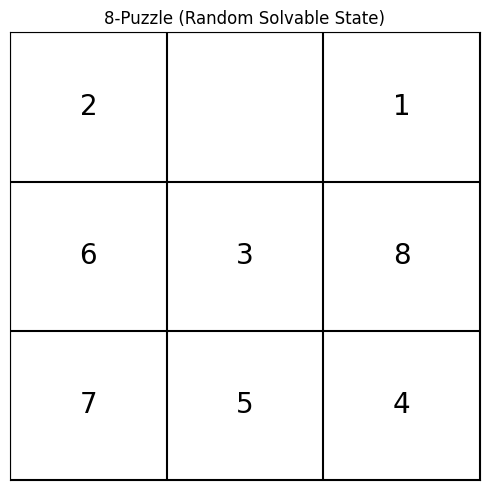

In [24]:
print("N-PUZZLE DEMONSTRATION")
print("=====================")

# Create example puzzles
puzzle_8 = NPuzzle(size=3)
puzzle_15 = NPuzzle(size=4)

# Visualize the puzzles
print("8-Puzzle (Random Solvable State):")
fig1 = puzzle_8.visualize(title="8-Puzzle (Random Solvable State)")
plt.show()


8-Puzzle (Goal State):


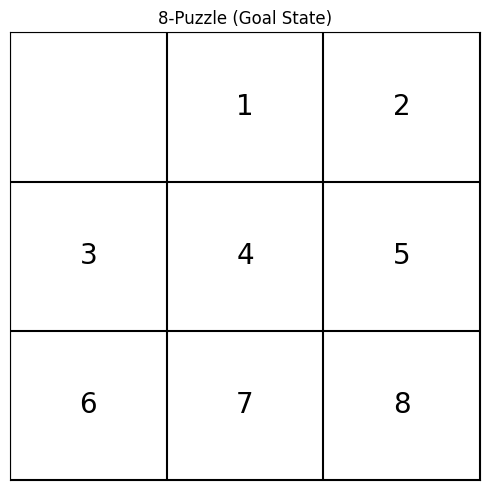

In [25]:
print("\n8-Puzzle (Goal State):")
fig2 = puzzle_8.visualize(puzzle_8.goal_state, title="8-Puzzle (Goal State)")
plt.show()


15-Puzzle (Random Solvable State):


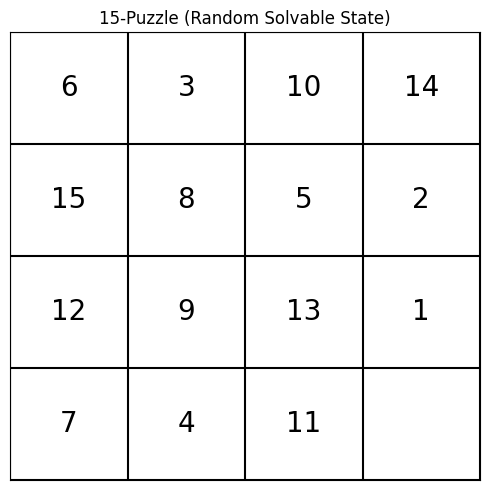

In [26]:
print("\n15-Puzzle (Random Solvable State):")
fig3 = puzzle_15.visualize(title="15-Puzzle (Random Solvable State)")
plt.show()


15-Puzzle (Goal State):


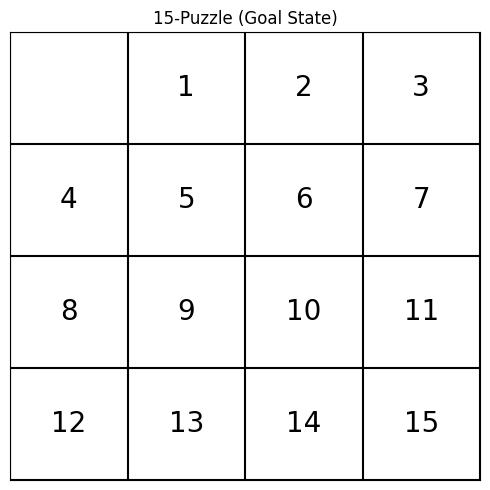

In [27]:
print("\n15-Puzzle (Goal State):")
fig4 = puzzle_15.visualize(puzzle_15.goal_state, title="15-Puzzle (Goal State)")
plt.show()

## Demo Puzzle


Creating a simpler puzzle for demonstration...


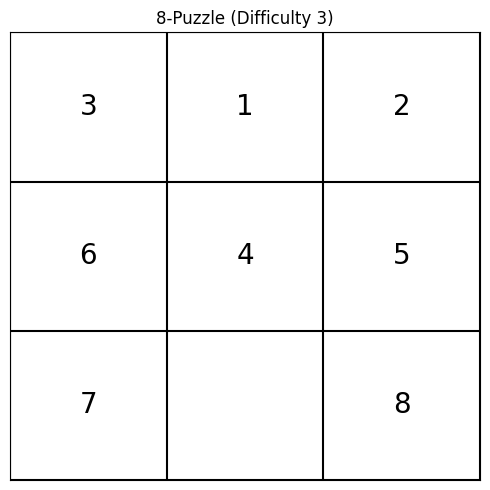

In [28]:
# Create a simpler puzzle for demonstration
print("\nCreating a simpler puzzle for demonstration...")
demo_puzzle = create_specific_puzzle(size=3, difficulty=3)
fig5 = demo_puzzle.visualize(title="8-Puzzle (Difficulty 3)")
plt.show()

In [29]:
# Run A* search on the puzzle
print("\nRunning A* search with Manhattan distance heuristic...")
path, actions, metrics, states = n_puzzle_search(
    demo_puzzle, 'astar', 'manhattan', max_iterations=1000
)


Running A* search with Manhattan distance heuristic...


✓ Solution found in 3 moves!
Actions: left, up, up
Time taken: 0.000059 seconds
Max frontier size: 4
States visited: 7
Iterations: 4

Final State (Goal):


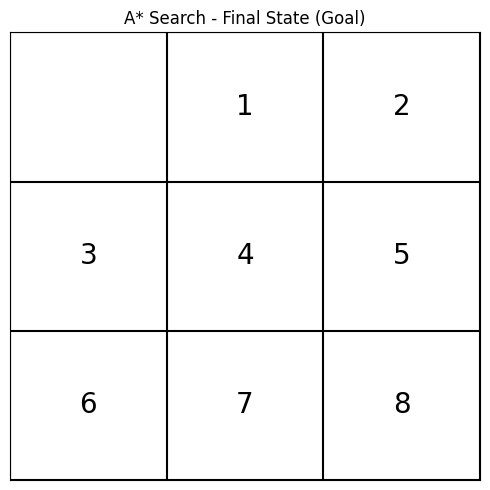

In [30]:
print(f"✓ Solution found in {len(path) - 1} moves!")
print(f"Actions: {', '.join(actions)}")
print(f"Time taken: {metrics['time']:.6f} seconds")
print(f"Max frontier size: {metrics['space']}")
print(f"States visited: {metrics['states_visited']}")
print(f"Iterations: {metrics['iterations']}")

# Show the final state
print("\nFinal State (Goal):")
fig6 = demo_puzzle.visualize(path[-1], title="A* Search - Final State (Goal)")
plt.show()

## Interactive

In [32]:
create_n_puzzle_demo(
    size=3,
    difficulty=5
)

## Simulations

In [33]:
# Run N-puzzle simulations
print("\nN-PUZZLE SIMULATIONS")
print("===================")

# Define parameters for the simulations
puzzle_algorithms = ['bfs', 'ucs', 'greedy', 'astar']  # Exclude DFS as it's often impractical for N-puzzle
puzzle_sizes = [3]  # Only use 8-puzzle (3x3) for efficiency
difficulties = [3, 5, 20, 100]  # Different difficulty levels

print("Running N-puzzle simulations (this may take a while)...")
# Run the simulations with reduced parameters for demonstration
sim_results_puzzle = run_n_puzzle_simulations(
    num_simulations=2,  # Reduced for demonstration
    algorithms=puzzle_algorithms,
    puzzle_sizes=puzzle_sizes,
    difficulties=difficulties
)

# Display the results
print("\nSimulation results (sample):")
sim_results_puzzle.head()


N-PUZZLE SIMULATIONS
Running N-puzzle simulations (this may take a while)...

Simulation results (sample):


,simulation,algorithm,puzzle_size,difficulty,path_found,path_length,path_cost,states_visited,max_frontier_size,iterations,time
0,0,bfs,3,3,True,3.0,3.0,29,12,18,0.000062
1,0,ucs,3,3,True,3.0,3.0,29,12,18,0.000062
2,0,greedy_manhattan,3,3,True,3.0,3.0,7,4,4,0.000035
3,0,greedy_misplaced,3,3,True,3.0,3.0,7,4,4,0.000021
4,0,greedy_linear_conflict,3,3,True,3.0,3.0,7,4,4,0.000084


In [34]:
# Calculate aggregate statistics
print("\nAggregate performance by algorithm:")
puzzle_summary = sim_results_puzzle.groupby('algorithm').agg({
    'time': ['mean', 'std'],
    'path_length': ['mean', 'std'],
    'path_cost': ['mean', 'std'],
    'states_visited': ['mean', 'std'],
    'max_frontier_size': ['mean', 'std'],
    'path_found': 'mean'
})

puzzle_summary


Aggregate performance by algorithm:


time           path_length            path_cost  \
                            mean       std        mean        std      mean   
algorithm                                                                     
astar_linear_conflict   0.001503  0.002060       11.00   7.964206     11.00   
astar_manhattan         0.001143  0.001634       11.00   7.964206     11.00   
astar_misplaced         0.007220  0.010140       11.00   7.964206     11.00   
bfs                     0.012338  0.015656         inf        NaN       inf   
greedy_linear_conflict  0.000559  0.000668       18.75  20.154758     18.75   
greedy_manhattan        0.000652  0.000791       30.50  36.288526     30.50   
greedy_misplaced        0.001480  0.003278       32.25  43.397663     32.25   
ucs                     0.021145  0.032165         inf        NaN       inf   

                                  states_visited               \
                              std           mean          std   
algorithm                                                       
astar_linear_conflict    7.964206        207.625   283.301423   
astar_manhattan          7.964206        322.625   454.590534   
astar_misplaced          7.964206       1900.625  2598.415338   
bfs                           NaN       3247.875  3813.728338   
greedy_linear_conflict  20.154758         71.875    91.868598   
greedy_manhattan        36.288526        194.375   241.237250   
greedy_misplaced        43.397663        449.125   856.829444   
ucs                           NaN       3217.250  3834.604049   

                       max_frontier_size              path_found  
                                    mean          std       mean  
algorithm                                                         
astar_linear_conflict             82.500   109.169593        1.0  
astar_manhattan                  123.750   171.492399        1.0  
astar_misplaced                  713.375   970.035778        1.0  
bfs                             1156.875  1347.012614        1.0  
greedy_linear_conflict            31.000    36.000000        1.0  
greedy_manhattan                  81.500    98.860652        1.0  
greedy_misplaced                 176.875   328.163477        1.0  
ucs                             1155.875  1359.755381        1.0

In [35]:
# Calculate success rate
puzzle_success_rate = sim_results_puzzle.groupby('algorithm')['path_found'].mean() * 100
print("\nSuccess rate by algorithm (%):")
puzzle_success_rate


Success rate by algorithm (%):


algorithm
astar_linear_conflict     100.0
astar_manhattan           100.0
astar_misplaced           100.0
bfs                       100.0
greedy_linear_conflict    100.0
greedy_manhattan          100.0
greedy_misplaced          100.0
ucs                       100.0
Name: path_found, dtype: float64

In [36]:
create_performance_charts(
    sim_results_puzzle, metric='time', title='Time Comparison for N-Puzzle')

alt.LayerChart(...)

In [37]:
create_performance_charts(sim_results_puzzle, metric='max_frontier_size',
                          title='Space Complexity Comparison for N-Puzzle')

alt.LayerChart(...)

In [38]:
create_performance_charts(sim_results_puzzle, metric='path_length',
                          title='Path Length Comparison for N-Puzzle')

alt.LayerChart(...)

In [39]:
create_heatmap(sim_results_puzzle, value_col='time',
               title='Time vs Difficulty by Algorithm')

alt.Chart(...)

In [40]:
sim_results_puzzle.query('algorithm=="bfs"')

,simulation,algorithm,puzzle_size,difficulty,path_found,path_length,path_cost,states_visited,max_frontier_size,iterations,time
0,0,bfs,3,3,True,3.0,3.0,29,12,18,0.000062
8,0,bfs,3,5,True,5.0,5.0,69,30,40,0.000099
16,0,bfs,3,20,True,inf,inf,7803,2803,5000,0.035867
24,0,bfs,3,100,True,12.0,12.0,2538,939,1601,0.005672
32,1,bfs,3,3,True,3.0,3.0,31,14,18,0.000049
40,1,bfs,3,5,True,5.0,5.0,95,41,55,0.000127
48,1,bfs,3,20,True,inf,inf,7709,2708,5000,0.028771
56,1,bfs,3,100,True,inf,inf,7709,2708,5000,0.028054
